In [1]:
import pandas as pd
import numpy as np

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(url, header=None, usecols=[0, 1, 2])
df.columns = ['Label', 'Alcohol', 'MalicAcid']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      178 non-null    int64  
 1   Alcohol    178 non-null    float64
 2   MalicAcid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [2]:
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [ ]:
'''
# STANDARDIZATION AND MIN-MAX SCALING'''

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

standard_scale = StandardScaler()
df_stdScale = standard_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_stdScale[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [5]:
minmax_scale = MinMaxScaler()
df_minmax = minmax_scale.fit_transform(df[['Alcohol', 'MalicAcid']])
df_minmax[:5]

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265]])

In [6]:
print(f"The mean of Standard Scaling: {np.mean(df_stdScale):.2f}")
print(f"The Standard Deviation of Standard Scaling: {np.std(df_stdScale):.2f}")

The mean of Standard Scaling: -0.00
The Standard Deviation of Standard Scaling: 1.00


In [7]:
print(f"The min of Min-Max Scaling: {df_minmax.min():.2f}")
print(f"The max of Min-Max Scaling: {df_minmax.max():.2f}")
print(f"The mean of Min-Max Scaling: {np.mean(df_minmax):.2f}")
print(f"The Standard Deviation of Min-Max Scaling: {np.std(df_minmax):.2f}")

The min of Min-Max Scaling: 0.00
The max of Min-Max Scaling: 1.00
The mean of Min-Max Scaling: 0.42
The Standard Deviation of Min-Max Scaling: 0.24


In [ ]:
PLOTTING

In [8]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))
    plt.scatter(df['Alcohol'], df['MalicAcid'],
                color='green', label='Input Scale', alpha=0.5)
    plt.scatter(df_stdScale[:, 0], df_stdScale[:, 1],
                color='red', label='Standardized [mean=0, std=1]', alpha=0.3)
    plt.scatter(df_minmax[:, 0], df_minmax[:, 1], label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout()

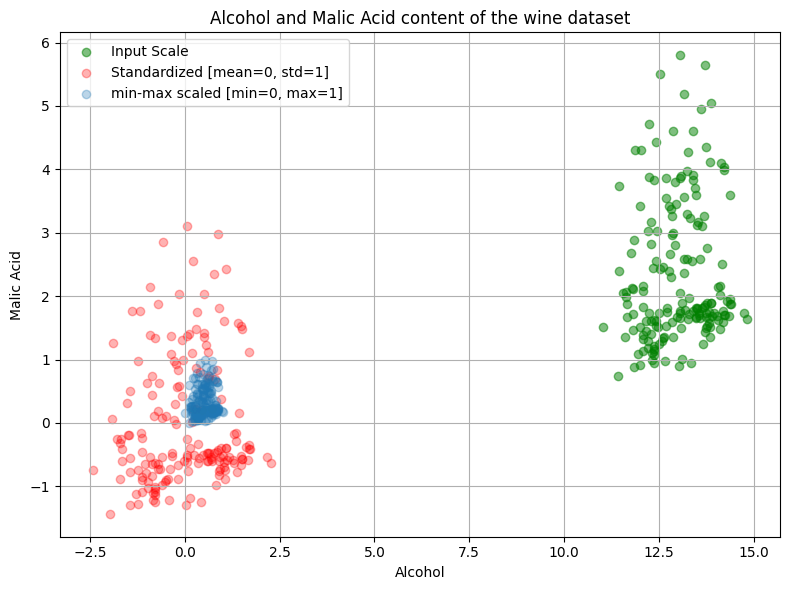

In [9]:
plot()
plt.show()

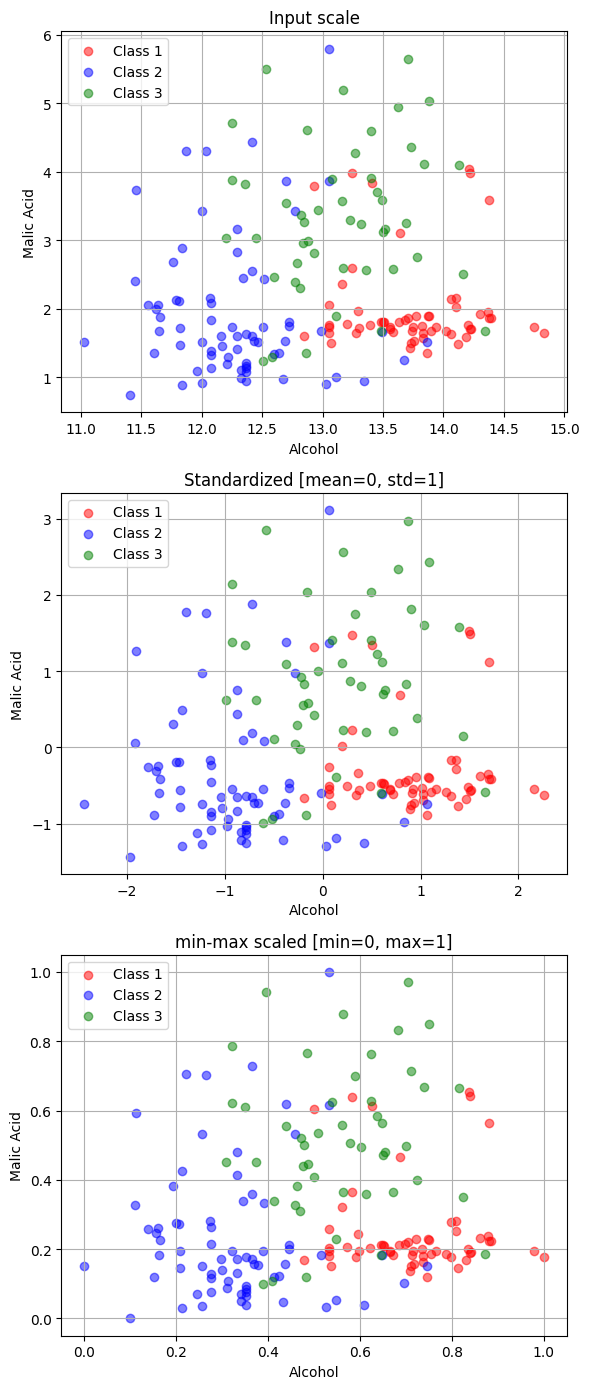

In [12]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'MalicAcid']].values, df_stdScale, df_minmax),
               ('Input scale',
                'Standardized [mean=0, std=1]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Label'].values == i, 0],
                  d[df['Label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
plt.show()

In [13]:
# Standardization

x = [1, 4, 5, 6, 6, 2, 3]
mean = sum(x)/len(x)

std_dev = (1/len(x) * sum([(x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

print("Native Python")
print(f"Array X: {x}\n")
print(f"Array X mean: {mean}\n")
print(f"Array X Standard Deviation: {std_dev}\n")
print(f"Array X Z Scores: {z_scores}\n")

print("NumPy for cross validation")
print(f"Numpy Array: {x}\n")
print(f"Numpy Array mean: {np.mean(x)}\n")
print(f"Numpy Array Standard Deviation: {np.std(x)}\n")
print(f"Numpy Z Scores: {[(x_i - np.mean(x))/np.std(x) for x_i in x]}\n")

print(f"Min-Max: {[(x_i - min(x))/ (max(x) - min(x)) for x_i in x]}")

Native Python
Array X: [1, 4, 5, 6, 6, 2, 3]

Array X mean: 3.857142857142857

Array X Standard Deviation: 1.8070158058105026

Array X Z Scores: [-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]

NumPy for cross validation
Numpy Array: [1, 4, 5, 6, 6, 2, 3]

Numpy Array mean: 3.857142857142857

Numpy Array Standard Deviation: 1.8070158058105026

Numpy Z Scores: [-1.5811388300841895, 0.07905694150420944, 0.6324555320336758, 1.185854122563142, 1.185854122563142, -1.0277402395547233, -0.4743416490252569]

Min-Max: [0.0, 0.6, 0.8, 1.0, 1.0, 0.2, 0.4]


In [ ]:
NUMPY

In [19]:
import numpy as np

# Standardization

x_np = np.array(x)

z_scores_np = (x_np - x_np.mean()) / x_np.std()

print(f"X NumPy array: {x_np}\n")
print(f"Z scores in Numpy: \n{z_scores_np}")

X NumPy array: [1 4 5 6 6 2 3]

Z scores in Numpy: 
[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]


In [20]:
# min-max scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())
print(f"Min-Max scaling in Numpy: \n{np_minmax}")

Min-Max scaling in Numpy: 
[0.  0.6 0.8 1.  1.  0.2 0.4]


In [21]:
df = pd.read_csv(url, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [22]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
from sklearn.model_selection import train_test_split

X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
print(f"The shape of X_train is: {X_train.shape}\n")
print(f"The shape of X_test is {X_test.shape}")

The shape of X_train is: (124, 13)

The shape of X_test is (54, 13)


In [30]:
# feature scaling standarisation

In [31]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [ ]:
# dimensionally REDUCTION  & PCA

In [33]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA().fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [34]:
# om standardized data
pca_std = PCA().fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

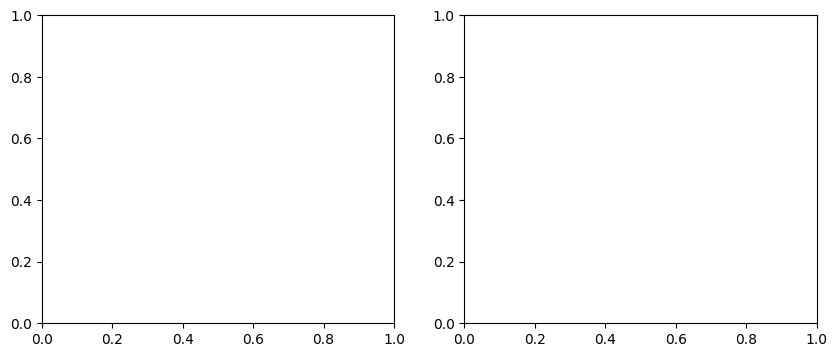

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


In [36]:
for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

In [37]:
for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')
ax2.set_title('Transformed standardized training dataset after PCA')

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

 ** TRAIN A NAVIE BAYES CLASSIFIER **

In [39]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
gnb_std.fit(X_train_std, y_train)

GaussianNB()

In [40]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset without Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset without Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset without Standardization
98.39%

Prediction accuracy for the test dataset without Standardization
92.59%



In [41]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset with Standardization')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset with Standardization')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset with Standardization
99.19%

Prediction accuracy for the test dataset with Standardization
100.00%



**OTHER CLASSIFIER**

** Naive Bayes Classifier, before Standardization classifier after PCA perform to around  64.81%  accuracy, after Standardization, performance increase to  98.15%

Similar to DecesionTreeClassifier, test set performance increase from  68.52%  to  96.30%

[ ]
Colab**